# 生成数组的函数

## arange

`arange` 类似于**Python**中的 `range` 函数，只不过返回的不是列表，而是数组：

    arange(start, stop=None, step=1, dtype=None)

产生一个在区间 `[start, stop)` 之间，以 `step` 为间隔的数组，如果只输入一个参数，则默认从 `0` 开始，并以这个值为结束：

In [2]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

与 `range` 不同， `arange` 允许非整数值输入，产生一个非整型的数组：

In [4]:
np.arange(0, 2 * np.pi, np.pi / 4)

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

数组的类型默认由参数 `start, stop, step` 来确定，也可以指定：

In [6]:
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([ 0.        ,  0.78539819,  1.57079637,  2.3561945 ,  3.14159274,
        3.92699099,  4.71238899,  5.49778748], dtype=float32)

由于存在精度问题，使用浮点数可能出现问题：

In [5]:
np.arange(1.5, 2.1, 0.3)

array([ 1.5,  1.8,  2.1])

`stop` 的值 `2.1` 出现在了数组中，所以使用浮点数的时候需要注意。

## linspace

    linspace(start, stop, N)

产生 `N` 个等距分布在 `[start, stop]`间的元素组成的数组，包括 `start, stop`。

In [7]:
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## logspace

    logspace(start, stop, N)

产生 N 个对数等距分布的数组，默认以10为底：

In [8]:
np.logspace(0, 1, 5)

array([  1.        ,   1.77827941,   3.16227766,   5.62341325,  10.        ])

产生的值为$\left[10^0, 10^{0.25},10^{0.5},10^{0.75},10^1\right]$。

## meshgrid

有时候需要在二维平面中生成一个等距网格，这时候可以使用 `meshgrid` 来完成这样的工作：

In [9]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

这里产生的 `x, y`如下：

In [10]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [11]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

`x` 对应网格的第一维，`y` 对应网格的第二维。

图例：

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

c:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide


事实上，`x, y` 中有很多冗余的元素，这里提供了一个 `sparse` 的选项： 

In [37]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [38]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [39]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在这个选项下，`x, y` 变成了单一的行向量和列向量。

但这并不影响结果：

c:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide


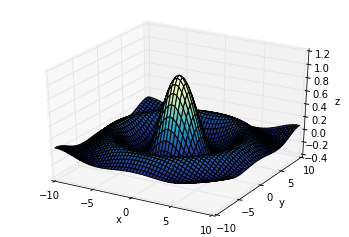

In [40]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## ogrid / mgrid